In [299]:
import pandas as pd
import numpy as np

In [301]:
ddf = df= pd.read_csv("train (1).csv")
test= pd.read_csv("test.csv")

In [302]:
print(df.shape, test.shape)

(8693, 14) (4277, 13)


In [303]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [304]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [305]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [306]:
df.describe(include=object)

PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                  Name  
count             8493  
unique            8473  
top     Gollux Reedall  
freq                 2

COLUMN SUMMARY

In [307]:
def column_summary(df):
    summary = pd.DataFrame()
    
    summary['Column Name'] = df.columns
    summary['Data Type'] = df.dtypes.values
    summary['Missing Values'] = df.isnull().sum().values
    summary['Unique Values'] = df.nunique().values

   # Separate summary for numerical columns
    numerical_cols = df.select_dtypes(include=['number'])
    
    summary_numerical = pd.DataFrame({
        'Column Name': numerical_cols.columns,
        'Mean': numerical_cols.mean(),
        'Standard Deviation': numerical_cols.std(),
        'Min': numerical_cols.min(),
        'Max': numerical_cols.max()
    }).reset_index(drop=True)
    
    # Merge both summaries (non-numerical columns won't have stats like mean)
    full_summary = pd.merge(summary, summary_numerical, on='Column Name', how='left') #pd.merge to combine the num columns with general col
        #'left' join ensures that non-numerical columns don't break the summary.
    return full_summary

# Call the function and print the summary
summary = column_summary(df)
print(summary)

     Column Name Data Type  Missing Values  Unique Values        Mean  \
0    PassengerId    object               0           8693         NaN   
1     HomePlanet    object             201              3         NaN   
2      CryoSleep    object             217              2         NaN   
3          Cabin    object             199           6560         NaN   
4    Destination    object             182              3         NaN   
5            Age   float64             179             80   28.827930   
6            VIP    object             203              2         NaN   
7    RoomService   float64             181           1273  224.687617   
8      FoodCourt   float64             183           1507  458.077203   
9   ShoppingMall   float64             208           1115  173.729169   
10           Spa   float64             183           1327  311.138778   
11        VRDeck   float64             188           1306  304.854791   
12          Name    object             200         

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [251]:
print(df.duplicated().sum())

0


In [252]:
df['VRDeck'].isna().sum()


188

In [253]:
df['Transported'].value_counts()


Transported
True     4378
False    4315
Name: count, dtype: int64

In [254]:
df['Transported'].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

In [255]:
print('The percentage of missing cells in the data are:',round(df.isna().sum().sum() / df.size * 100, 1),'%')

The percentage of missing cells in the data are: 1.9 %


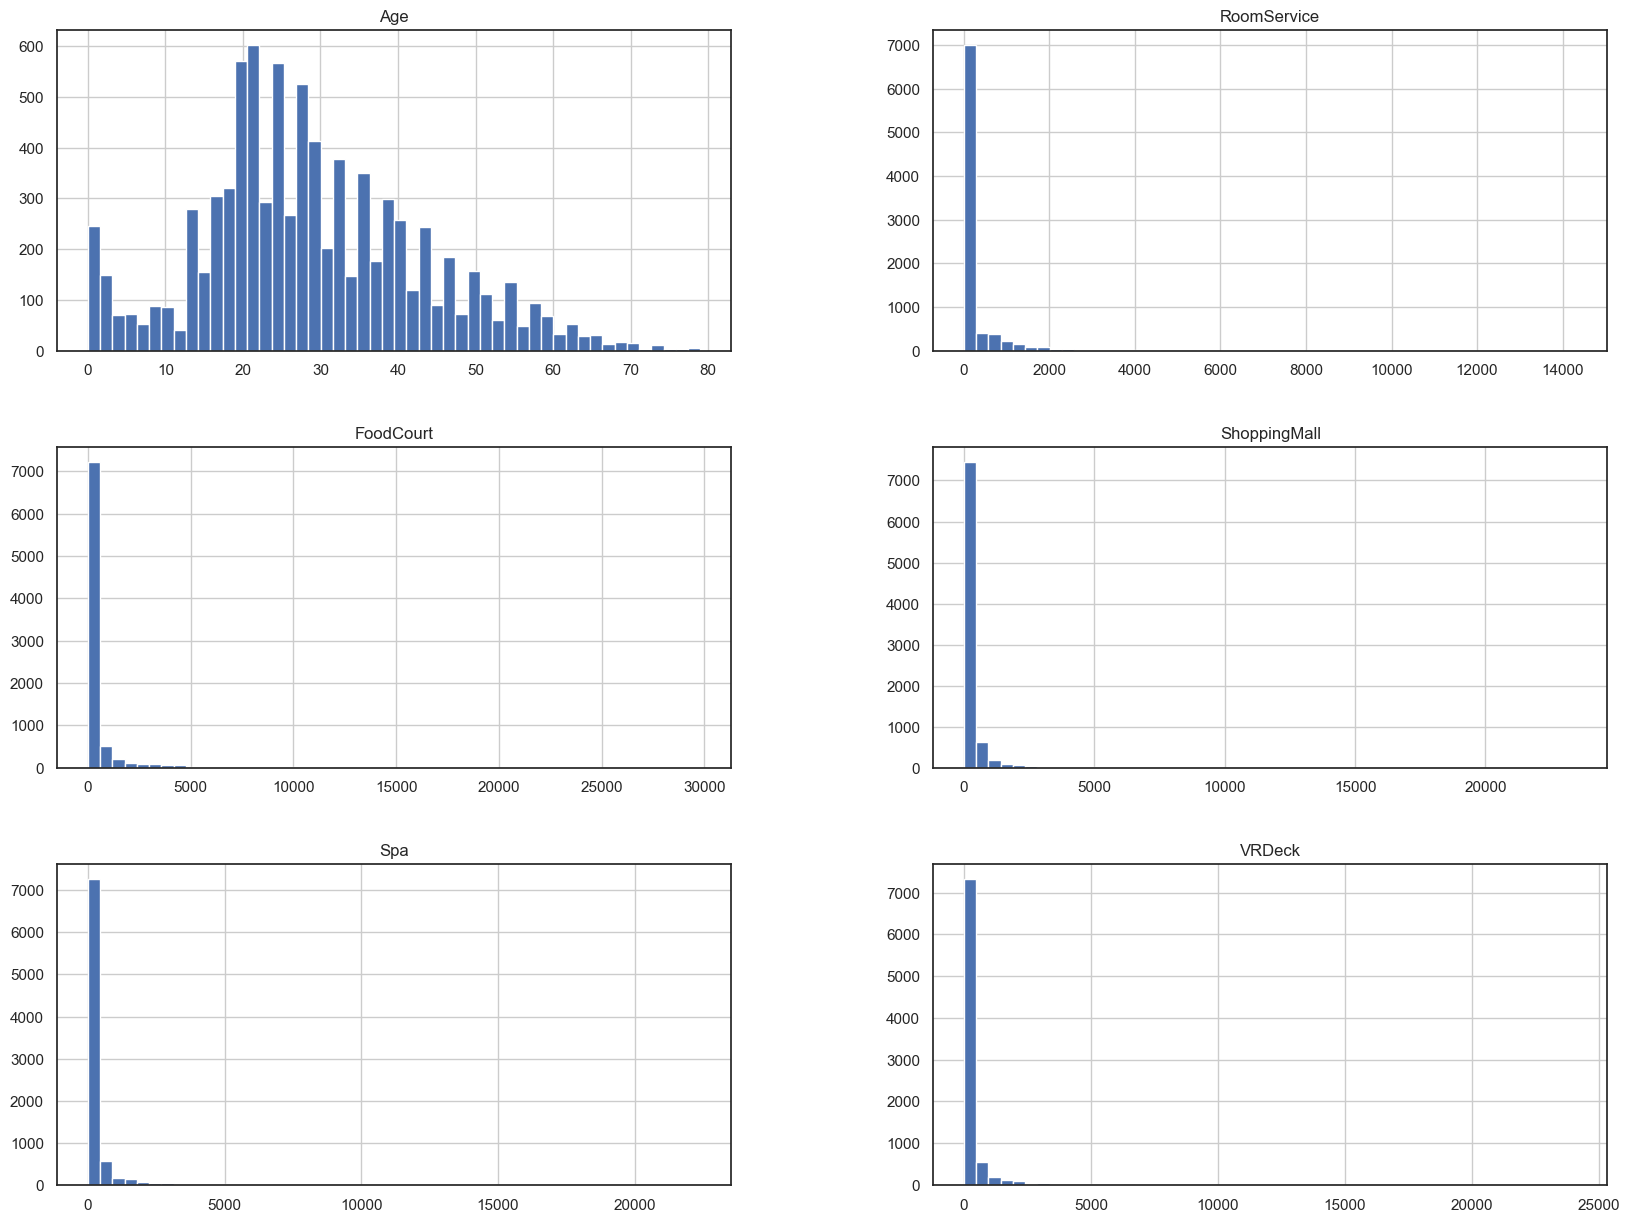

In [256]:
import	matplotlib.pyplot	as	plt
df.hist(bins=50,	figsize=(20,15))
plt.show()

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
SO, 

In [309]:
#gathering the categorical columns together
req_col = df.drop(columns=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])
print(req_col)

     PassengerId HomePlanet CryoSleep     Cabin    Destination    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  False   
...          ...        ...       ...       ...            ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  False   

                   Name  Transported  
0       Maham Ofracculy        False  
1          Juanna Vines         True  
2     

DATA TRANSFORMATION

In [310]:
negative_age_df = df[df['Age'] < 0]

# Display rows with negative Victim_Age values
negative_age_df

age = df['Age'].median()
df["Age"]= df['Age'].fillna(age)

In [312]:
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

BINARY ENCODING

In [260]:
#df['VIP'] = df['VIP'].fillna(' ')
#df['CryoSleep'] = df['CryoSleep'].fillna(' ')
#df['Transported'] = df['Transported'].fillna(' ')
#
#print(df)



In [313]:
#Convert True/False to 1/0
df['VIP'] = df['VIP'].fillna(0 ).astype(int )
df['CryoSleep'] = df['CryoSleep'].fillna(0 ).astype(int)
df['Transported'] = df['Transported'].fillna( 0).astype(int)

print(df)

     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age  VIP  \
0        0001_01     Europa          0     B/0/P    TRAPPIST-1e  39.0    0   
1        0002_01      Earth          0     F/0/S    TRAPPIST-1e  24.0    0   
2        0003_01     Europa          0     A/0/S    TRAPPIST-1e  58.0    1   
3        0003_02     Europa          0     A/0/S    TRAPPIST-1e  33.0    0   
4        0004_01      Earth          0     F/1/S    TRAPPIST-1e  16.0    0   
...          ...        ...        ...       ...            ...   ...  ...   
8688     9276_01     Europa          0    A/98/P    55 Cancri e  41.0    1   
8689     9278_01      Earth          1  G/1499/S  PSO J318.5-22  18.0    0   
8690     9279_01      Earth          0  G/1500/S    TRAPPIST-1e  26.0    0   
8691     9280_01     Europa          0   E/608/S    55 Cancri e  32.0    0   
8692     9280_02     Europa          0   E/608/S    TRAPPIST-1e  44.0    0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck     

In [262]:
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
amt_spent = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']]
print(amt_spent)

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  TotalSpent
0             0.0        0.0           0.0     0.0     0.0         0.0
1           109.0        9.0          25.0   549.0    44.0       736.0
2            43.0     3576.0           0.0  6715.0    49.0     10383.0
3             0.0     1283.0         371.0  3329.0   193.0      5176.0
4           303.0       70.0         151.0   565.0     2.0      1091.0
...           ...        ...           ...     ...     ...         ...
8688          0.0     6819.0           0.0  1643.0    74.0      8536.0
8689          0.0        0.0           0.0     0.0     0.0         0.0
8690          0.0        0.0        1872.0     1.0     0.0      1873.0
8691          0.0     1049.0           0.0   353.0  3235.0      4637.0
8692        126.0     4688.0           0.0     0.0    12.0      4826.0

[8693 rows x 6 columns]


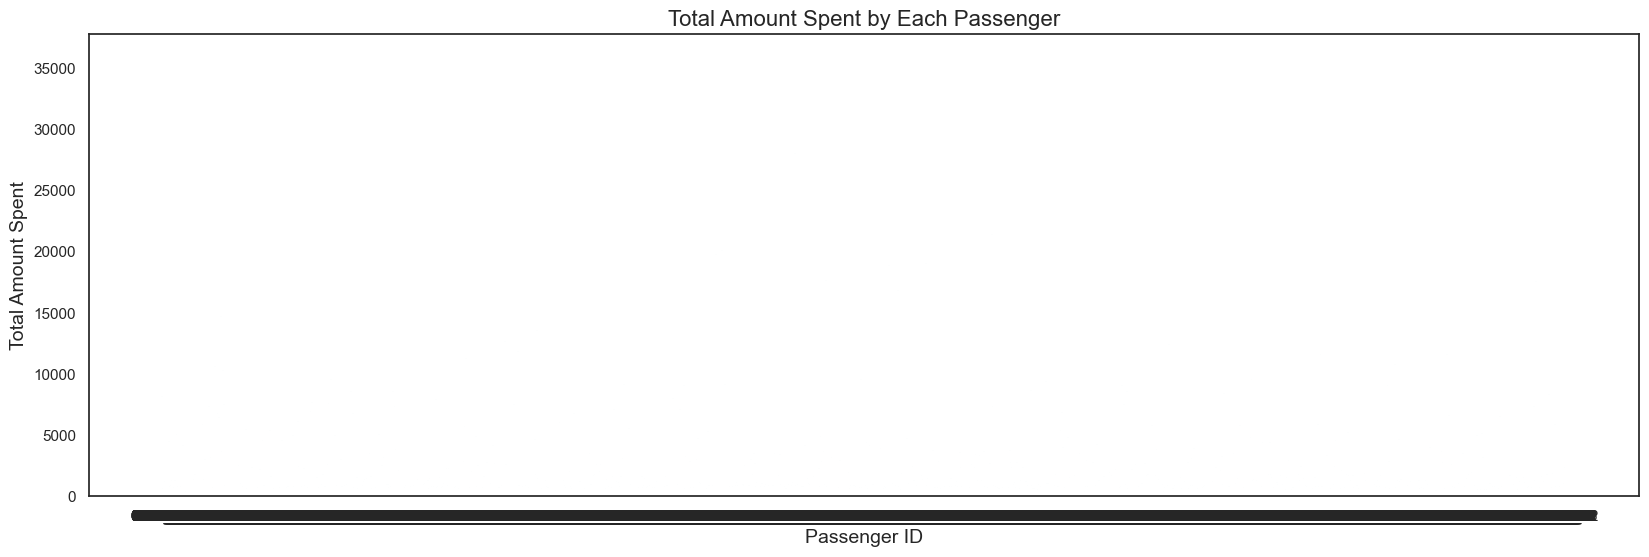

In [263]:
# Plotting the total amount spent by each individual
plt.figure(figsize=(20, 6))
plt.bar(df['PassengerId'], df['TotalSpent'], color='skyblue')

# Adding title and labels
plt.title('Total Amount Spent by Each Passenger', fontsize=16)
plt.xlabel('Passenger ID', fontsize=14)
plt.ylabel('Total Amount Spent', fontsize=14)

# Displaying the plot
plt.show()

In [264]:
print(df['TotalSpent'].max())
print(df['TotalSpent'].min())

35987.0
0.0


In [265]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'TotalSpent'],
      dtype='object')

In [314]:
req_col

PassengerId HomePlanet CryoSleep     Cabin    Destination    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  False   
...          ...        ...       ...       ...            ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  False   

                   Name  Transported  
0       Maham Ofracculy        False  
1          Juanna Vines         True  
2         Altark Susent        False  
3          Solam Susent        False  
4     Willy Santantines         True  
...                 ...          ...  
8688  Gravior Noxnuther        False  
8689    Kurta Mondalley        False  
8690       Fayey Connon         True  
8691   Celeon Hontichre        False  
8692   Propsh Hontichre         True  

[8693 rows x 8 columns]

In [315]:
df

PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age  VIP  \
0        0001_01     Europa          0     B/0/P    TRAPPIST-1e  39.0    0   
1        0002_01      Earth          0     F/0/S    TRAPPIST-1e  24.0    0   
2        0003_01     Europa          0     A/0/S    TRAPPIST-1e  58.0    1   
3        0003_02     Europa          0     A/0/S    TRAPPIST-1e  33.0    0   
4        0004_01      Earth          0     F/1/S    TRAPPIST-1e  16.0    0   
...          ...        ...        ...       ...            ...   ...  ...   
8688     9276_01     Europa          0    A/98/P    55 Cancri e  41.0    1   
8689     9278_01      Earth          1  G/1499/S  PSO J318.5-22  18.0    0   
8690     9279_01      Earth          0  G/1500/S    TRAPPIST-1e  26.0    0   
8691     9280_01     Europa          0   E/608/S    55 Cancri e  32.0    0   
8692     9280_02     Europa          0   E/608/S    TRAPPIST-1e  44.0    0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0               0  
1               1  
2               0  
3               0  
4               1  
...           ...  
8688            0  
8689            0  
8690            1  
8691            0  
8692            1  

[8693 rows x 14 columns]

Calculating the coorelation matric for the CATEGORICAL COLUMNS using `cramers_v` function which uses chi-square statistics

LABEL ENCODING

In [331]:
from sklearn import preprocessing

# Convert boolean columns to strings
df = df.astype(str)

label = preprocessing.LabelEncoder()
data = pd.DataFrame() 

for i in df.columns :
  data[i]=label.fit_transform(df[i])

df = ddf

In [317]:
data.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  VIP  \
0            0           1          0    149            2   33    0   
1            1           0          0   2184            2   17    0   
2            2           1          0      1            2   54    1   
3            3           1          0      1            2   27    0   
4            4           0          0   2186            2    8    0   

   RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  Transported  
0            0          0             0     0       0  5252            0  
1           54       1438           435   933     781  4502            1  
2          779        779             0  1065     842   457            0  
3            0        142           585   645     362  7149            0  
4          621       1229           202   953     382  8319            1

In [318]:
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age VIP  \
0        0001_01     Europa         0     B/0/P    TRAPPIST-1e  39.0   0   
1        0002_01      Earth         0     F/0/S    TRAPPIST-1e  24.0   0   
2        0003_01     Europa         0     A/0/S    TRAPPIST-1e  58.0   1   
3        0003_02     Europa         0     A/0/S    TRAPPIST-1e  33.0   0   
4        0004_01      Earth         0     F/1/S    TRAPPIST-1e  16.0   0   
...          ...        ...       ...       ...            ...   ...  ..   
8688     9276_01     Europa         0    A/98/P    55 Cancri e  41.0   1   
8689     9278_01      Earth         1  G/1499/S  PSO J318.5-22  18.0   0   
8690     9279_01      Earth         0  G/1500/S    TRAPPIST-1e  26.0   0   
8691     9280_01     Europa         0   E/608/S    55 Cancri e  32.0   0   
8692     9280_02     Europa         0   E/608/S    TRAPPIST-1e  44.0   0   

     RoomService FoodCourt ShoppingMall     Spa  VRDeck               Name  \
0            0.0       0.0          0.0     0.0     0.0    Maham Ofracculy   
1          109.0       9.0         25.0   549.0    44.0       Juanna Vines   
2           43.0    3576.0          0.0  6715.0    49.0      Altark Susent   
3            0.0    1283.0        371.0  3329.0   193.0       Solam Susent   
4          303.0      70.0        151.0   565.0     2.0  Willy Santantines   
...          ...       ...          ...     ...     ...                ...   
8688         0.0    6819.0          0.0  1643.0    74.0  Gravior Noxnuther   
8689         0.0       0.0          0.0     0.0     0.0    Kurta Mondalley   
8690         0.0       0.0       1872.0     1.0     0.0       Fayey Connon   
8691         0.0    1049.0          0.0   353.0  3235.0   Celeon Hontichre   
8692       126.0    4688.0          0.0     0.0    12.0   Propsh Hontichre   

     Transported  
0              0  
1              1  
2              0  
3              0  
4              1  
...          ...  
8688           0  
8689           0  
8690           1  
8691           0  
8692           1  

[8693 rows x 14 columns]

In [332]:
ddf

PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age  VIP  \
0        0001_01     Europa          0     B/0/P    TRAPPIST-1e  39.0    0   
1        0002_01      Earth          0     F/0/S    TRAPPIST-1e  24.0    0   
2        0003_01     Europa          0     A/0/S    TRAPPIST-1e  58.0    1   
3        0003_02     Europa          0     A/0/S    TRAPPIST-1e  33.0    0   
4        0004_01      Earth          0     F/1/S    TRAPPIST-1e  16.0    0   
...          ...        ...        ...       ...            ...   ...  ...   
8688     9276_01     Europa          0    A/98/P    55 Cancri e  41.0    1   
8689     9278_01      Earth          1  G/1499/S  PSO J318.5-22  18.0    0   
8690     9279_01      Earth          0  G/1500/S    TRAPPIST-1e  26.0    0   
8691     9280_01     Europa          0   E/608/S    55 Cancri e  32.0    0   
8692     9280_02     Europa          0   E/608/S    TRAPPIST-1e  44.0    0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported Deck Cabin_num Side  
0               0    B         0    P  
1               1    F         0    S  
2               0    A         0    S  
3               0    A         0    S  
4               1    F         1    S  
...           ...  ...       ...  ...  
8688            0    A        98    P  
8689            0    G      1499    S  
8690            1    G      1500    S  
8691            0    E       608    S  
8692            1    E       608    S  

[8693 rows x 17 columns]

In [269]:
df = data

Building the Cramers-V function

In [333]:
from scipy.stats import chi2_contingency
import numpy as np
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)




def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

rows= []

# Build the matrix with debugging output
for var1 in data:
    col = []
    for var2 in data:
        try:
            # Create a confusion matrix for the two variables
            confusion_matrix = pd.crosstab(data[var1], data[var2])
            # Calculate Cramér's V
            cramers = cramers_v(confusion_matrix)
            col.append(round(cramers, 2))  # Round the result
        except Exception as e:
            print(f"Error processing {var1} vs {var2}: {e}")
            col.append(np.nan)  # Append NaN in case of error
    rows.append(col)


cramers_results = np.array(rows)
map = pd.DataFrame(cramers_results, columns = data.columns, index =data.columns)



map

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  \
PassengerId           NaN         NaN        NaN    NaN          NaN   NaN   
HomePlanet            NaN        1.00       0.11   0.38         0.21  0.18   
CryoSleep             NaN        0.11       1.00   0.00         0.12  0.14   
Cabin                 NaN        0.38       0.00   1.00         0.18  0.00   
Destination           inf        0.21       0.12   0.18         1.00  0.04   
Age                   NaN        0.18       0.14   0.00         0.04  1.00   
VIP                   NaN        0.17       0.08   0.00         0.04  0.14   
RoomService           inf        0.19       0.36   0.30         0.00  0.00   
FoodCourt             NaN        0.10       0.35   0.00         0.00  0.00   
ShoppingMall          inf        0.13       0.38   0.31         0.00  0.00   
Spa                   inf        0.03       0.40   0.07         0.00  0.13   
VRDeck                inf        0.13       0.37   0.03         0.00  0.00   
Name                  NaN        0.00       0.03   0.00         0.04  0.00   
Transported           inf        0.19       0.46   0.18         0.11  0.14   
Deck                  NaN        0.60       0.32   0.50         0.20  0.13   
Cabin_num             inf        0.32       0.00   0.56         0.11  0.00   
Side                  NaN        0.03       0.03   0.50         0.00  0.00   

               VIP  RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  \
PassengerId    NaN          inf        inf           inf   NaN     NaN   NaN   
HomePlanet    0.17         0.19       0.10          0.13  0.03    0.13  0.00   
CryoSleep     0.08         0.36       0.35          0.38  0.40    0.37  0.03   
Cabin         0.00         0.30       0.00          0.31  0.07    0.03  0.00   
Destination   0.04         0.00       0.00          0.00  0.00    0.00  0.04   
Age           0.14         0.00       0.00          0.00  0.13    0.00  0.00   
VIP           1.00         0.30       0.52          0.22  0.40    0.45  0.10   
RoomService   0.30         1.00       0.00          0.38  0.16    0.05  0.00   
FoodCourt     0.52         0.00       1.00          0.14  0.49    0.52  0.10   
ShoppingMall  0.22         0.38       0.14          1.00  0.19    0.09  0.00   
Spa           0.40         0.16       0.49          0.19  1.00    0.42  0.00   
VRDeck        0.45         0.05       0.52          0.09  0.42    1.00  0.07   
Name          0.10         0.00       0.10          0.00  0.00    0.07  1.00   
Transported   0.03         0.28       0.26          0.27  0.27    0.25  0.01   
Deck          0.19         0.17       0.36          0.00  0.30    0.33  0.00   
Cabin_num     0.00         0.15       0.00          0.17  0.00    0.00  0.05   
Side          0.00         0.00       0.05          0.00  0.06    0.00  0.08   

              Transported  Deck  Cabin_num  Side  
PassengerId           inf   NaN        inf   NaN  
HomePlanet           0.19  0.60       0.32  0.03  
CryoSleep            0.46  0.32       0.00  0.03  
Cabin                0.18  0.50       0.56  0.50  
Destination          0.11  0.20       0.11  0.00  
Age                  0.14  0.13       0.00  0.00  
VIP                  0.03  0.19       0.00  0.00  
RoomService          0.28  0.17       0.15  0.00  
FoodCourt            0.26  0.36       0.00  0.05  
ShoppingMall         0.27  0.00       0.17  0.00  
Spa                  0.27  0.30       0.00  0.06  
VRDeck               0.25  0.33       0.00  0.00  
Name                 0.01  0.00       0.05  0.08  
Transported          1.00  0.21       0.14  0.10  
Deck                 0.21  1.00       0.32  0.71  
Cabin_num            0.14  0.32       1.00  0.61  
Side                 0.10  0.71       0.61  1.00

Adding a heatmap to the matrix

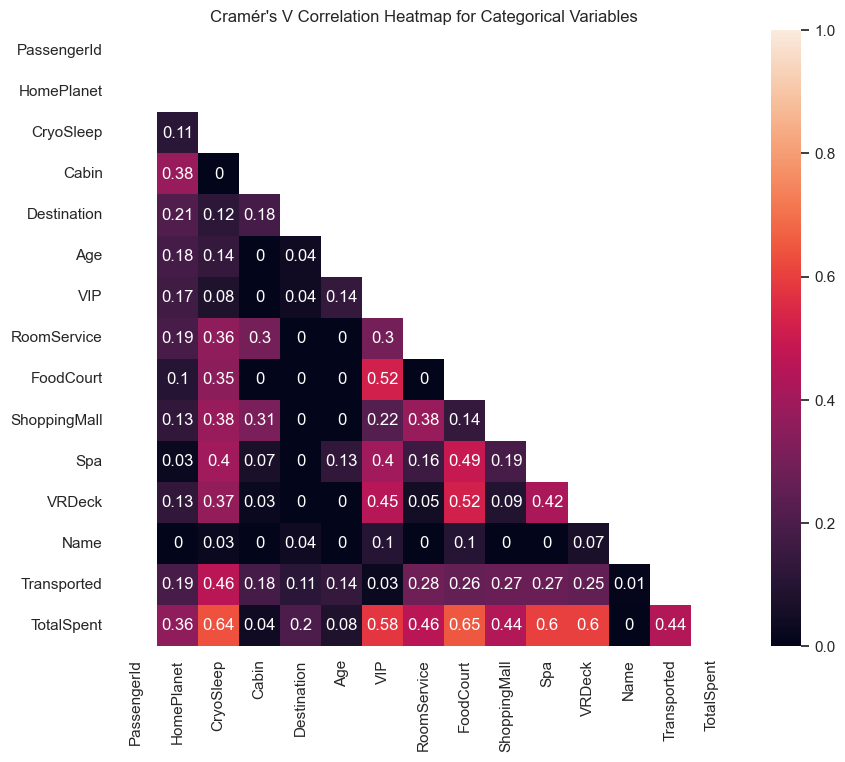

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(map, dtype=bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  plt.figure(figsize=(10, 8))
  plt.title("Cramér's V Correlation Heatmap for Categorical Variables")
  ax = sns.heatmap(map, annot=True,mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [319]:
# Get value counts for CryoSleep column
cryosleep_counts = data['CryoSleep'].value_counts()
cryosleep_counts

CryoSleep
0    5656
1    3037
Name: count, dtype: int64

Passengers in cryosleep are confined to their cabins else are not.

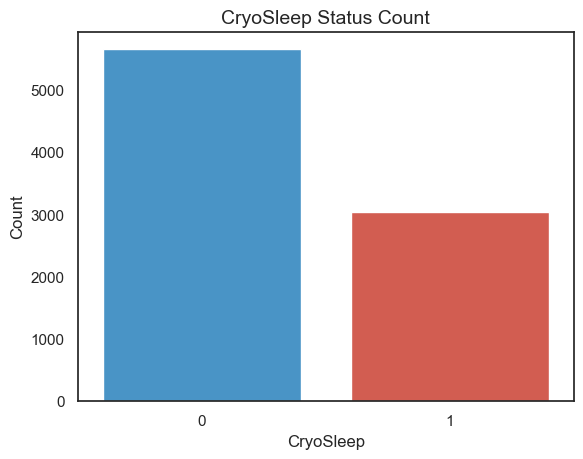

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


# Plotting a bar graph for CryoSleep counts
sns.barplot(x=cryosleep_counts.index, y=cryosleep_counts.values, palette=["#3498db", "#e74c3c"])  # Blue and Red

# Labeling
plt.xlabel('CryoSleep', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('CryoSleep Status Count', fontsize=14)

# Display the plot
plt.show()


In [322]:
y = df['Transported']
X = df.drop('Transported',axis=1)
print(df.shape, y.shape)
print(test.shape)

(8693, 14) (8693,)
(4277, 13)


In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train shape : ", X_train.shape)
print("X test shape : ", X_test.shape)
print("y train shape : ", y_train.shape)
print("y test shape : ", y_test.shape)

X train shape :  (6954, 13)
X test shape :  (1739, 13)
y train shape :  (6954,)
y test shape :  (1739,)


we are going to use seaborn plot

Before violin and swarm plot we need to normalization or standirdization.
The green and coral sections correspond to the Transported variable, which has values of 0 and 1. This indicates whether a passenger was transported or not
#0 (not transported) is represented with light green.
#1 (transported) is represented with light coral.

In [324]:
data = df


In [325]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age VIP RoomService  \
0     0001_01     Europa         0  B/0/P  TRAPPIST-1e  39.0   0         0.0   
1     0002_01      Earth         0  F/0/S  TRAPPIST-1e  24.0   0       109.0   
2     0003_01     Europa         0  A/0/S  TRAPPIST-1e  58.0   1        43.0   
3     0003_02     Europa         0  A/0/S  TRAPPIST-1e  33.0   0         0.0   
4     0004_01      Earth         0  F/1/S  TRAPPIST-1e  16.0   0       303.0   

  FoodCourt ShoppingMall     Spa VRDeck               Name Transported  
0       0.0          0.0     0.0    0.0    Maham Ofracculy           0  
1       9.0         25.0   549.0   44.0       Juanna Vines           1  
2    3576.0          0.0  6715.0   49.0      Altark Susent           0  
3    1283.0        371.0  3329.0  193.0       Solam Susent           0  
4      70.0        151.0   565.0    2.0  Willy Santantines           1

In [326]:
X = data.drop('Transported', axis=1)

In [327]:
y = df['Transported']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PassengerId'),
  Text(1, 0, 'HomePlanet'),
  Text(2, 0, 'CryoSleep'),
  Text(3, 0, 'Cabin'),
  Text(4, 0, 'Destination'),
  Text(5, 0, 'Age'),
  Text(6, 0, 'VIP'),
  Text(7, 0, 'RoomService'),
  Text(8, 0, 'FoodCourt'),
  Text(9, 0, 'ShoppingMall')])

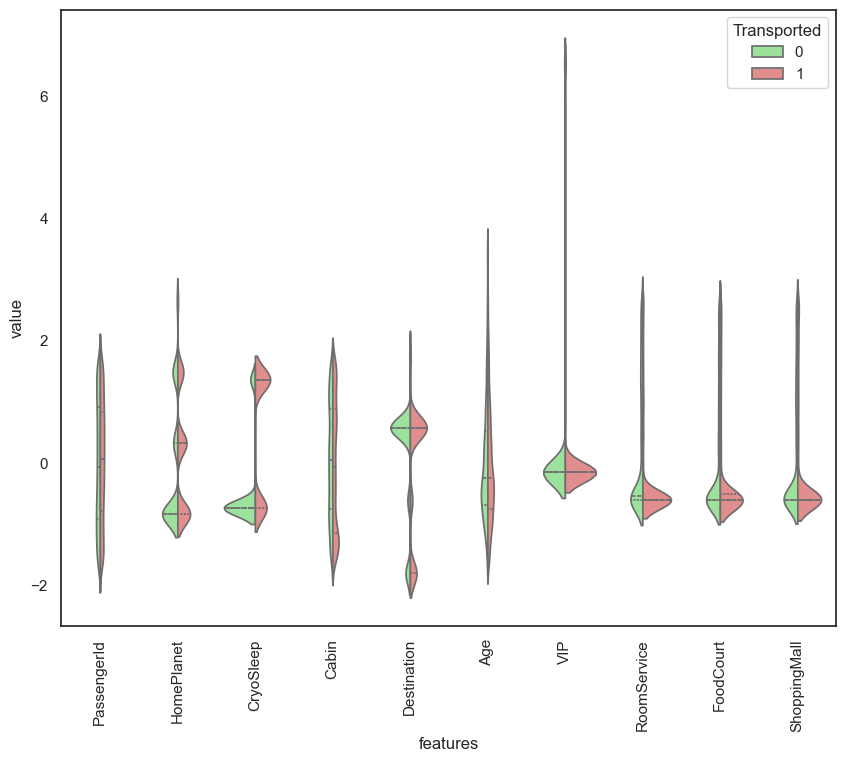

In [281]:
# first ten features
import seaborn as sns
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Transported",
                    var_name="features",
                    value_name='value')

palette_colors = {0: "lightgreen", 1: "lightcoral"} 
plt.figure(figsize=(10,8))
sns.violinplot(x="features", y="value", hue="Transported", data=data,split=True, inner="quart", palette=palette_colors)
plt.xticks(rotation=90)


Features like<br>
> HomePlanet :- shows the distribution of passengers from different home planets.<br>
> CryoSleep:- Has distinct separation in the distribution. Plot shows there may be a strong correlation between passengers who were in cryosleep and whether they were transported<br>
> Destination:- It could be a predictive feature similar to HomePlanet<br>
**Hence, these features may have predictive power.**<br>
AND<br>
> RoomService, FoodCourt, ShoppingMall:- These features have more concentrated distributions, but the overlap between Transported = 0 and 1 is high. <br>
**This could mean that these features have less predictive power for determining if a passenger was transported.**<br>

([0, 1, 2],
 [Text(0, 0, 'VRDeck'), Text(1, 0, 'Name'), Text(2, 0, 'TotalSpent')])

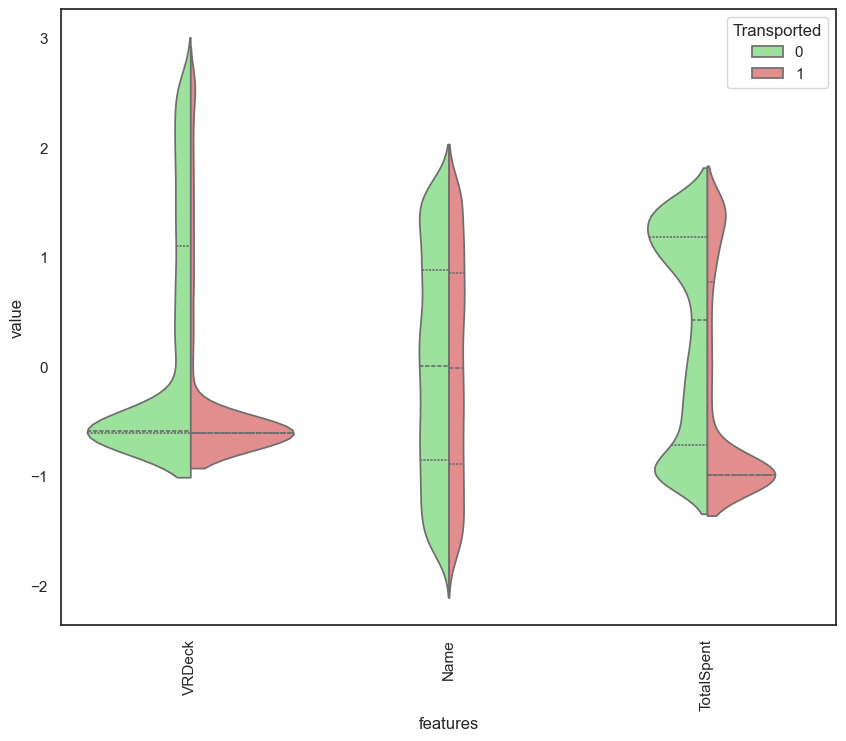

In [283]:
# first ten features
import seaborn as sns
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,11:15]],axis=1)
data = pd.melt(data,id_vars="Transported",
                    var_name="features",
                    value_name='value')

palette_colors = {0: 'lightgreen' , 1: "lightcoral"} 
plt.figure(figsize=(10,8))
sns.violinplot(x="features", y="value", hue="Transported", data=data,split=True, inner="quart", palette=palette_colors)
plt.xticks(rotation=90)

Take-aways
1. Passengers who were transported (1) generally have a lower spread and density around the lower spend values compared to those not transported (0).
2. Passengers who were transported show a wider range of spending on VRDeck services, indicating higher and more variable expenditure compared to others.

PAIR-PLOT
visualizing the relationships between three variables: 'CryoSleep', 'HomePlanet', and 'Destination'.

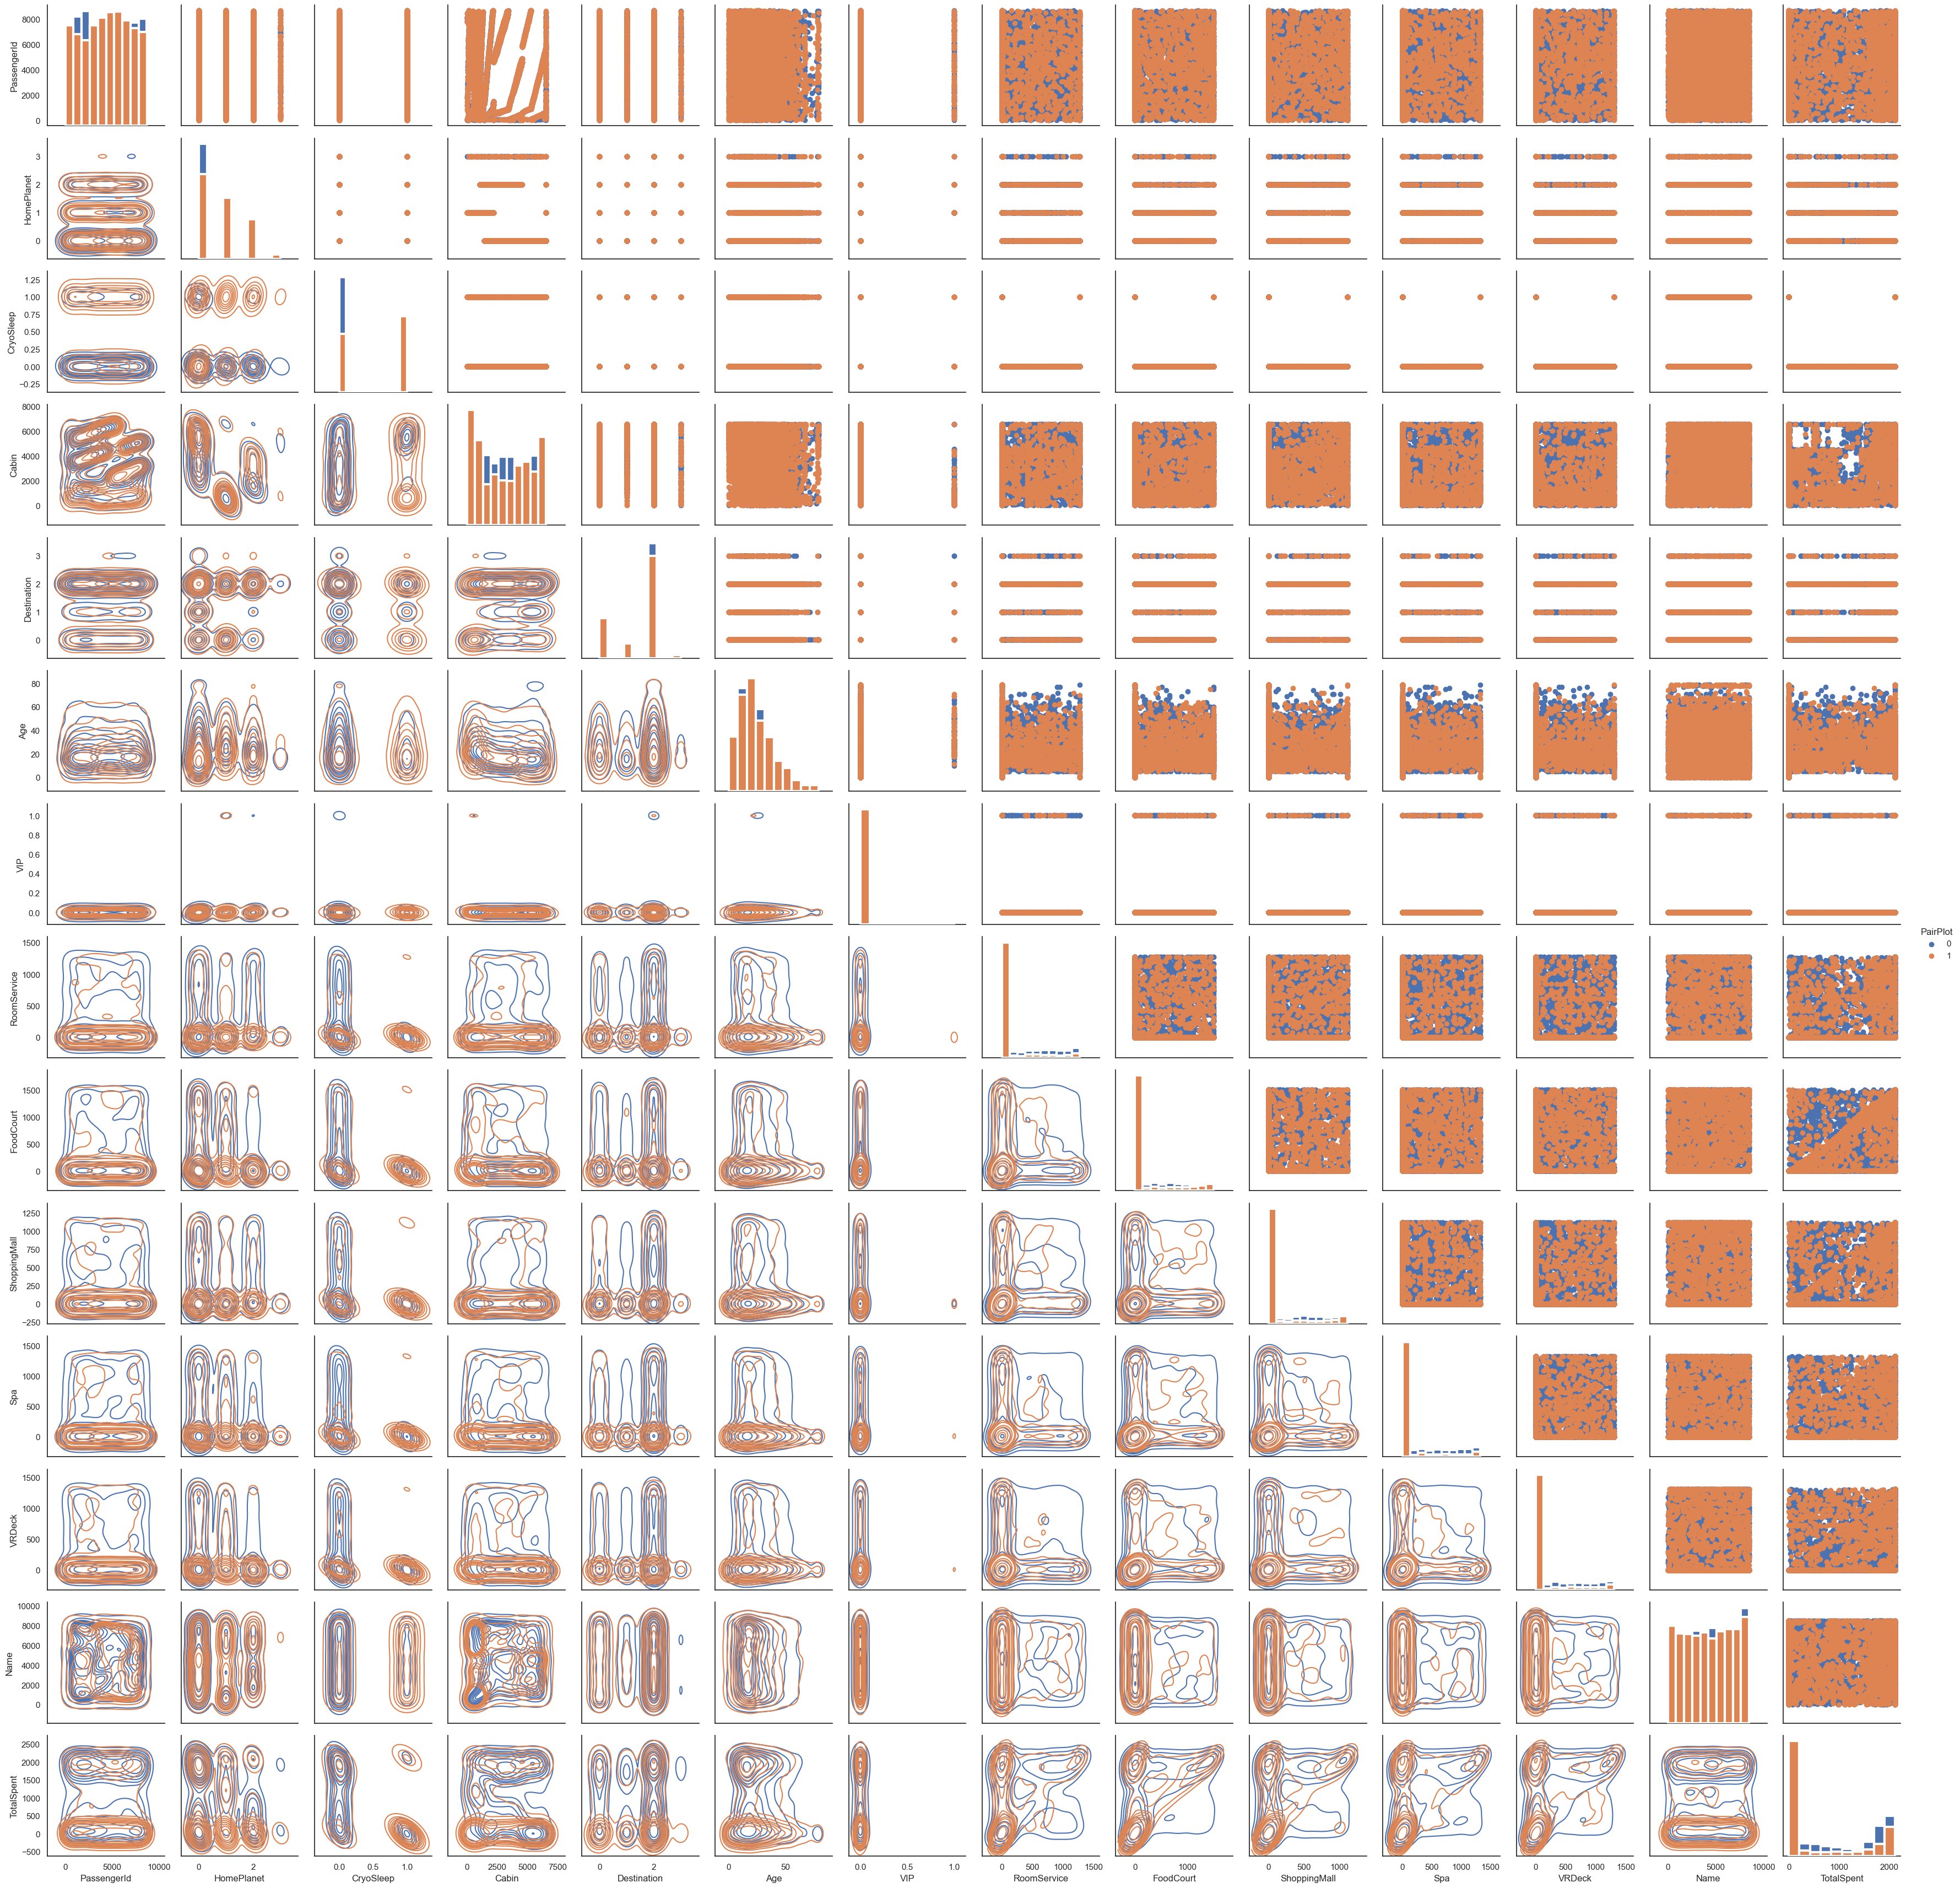

In [285]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

sns.set(style="white")
#df = X.loc[:,['CryoSleep','HomePlanet','Destination']]
g = sns.PairGrid(df, diag_sharey=False,  hue="Transported")
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(plt.hist, lw=3)
g.add_legend(title="PairPlot", adjust_subtitles=True)

CryoSleep is a popular choice: The significant number of passengers using CryoSleep highlights its potential advantages during space travel.<n>
Earth is the dominant home planet: The majority of passengers originate from Earth, suggesting the ship's departure point.<n>
Passengers from Earth have a preferred destination: The strong clustering in the HomePlanet vs. Destination plot indicates that a specific destination is likely a popular choice among passengers from Earth.<n>

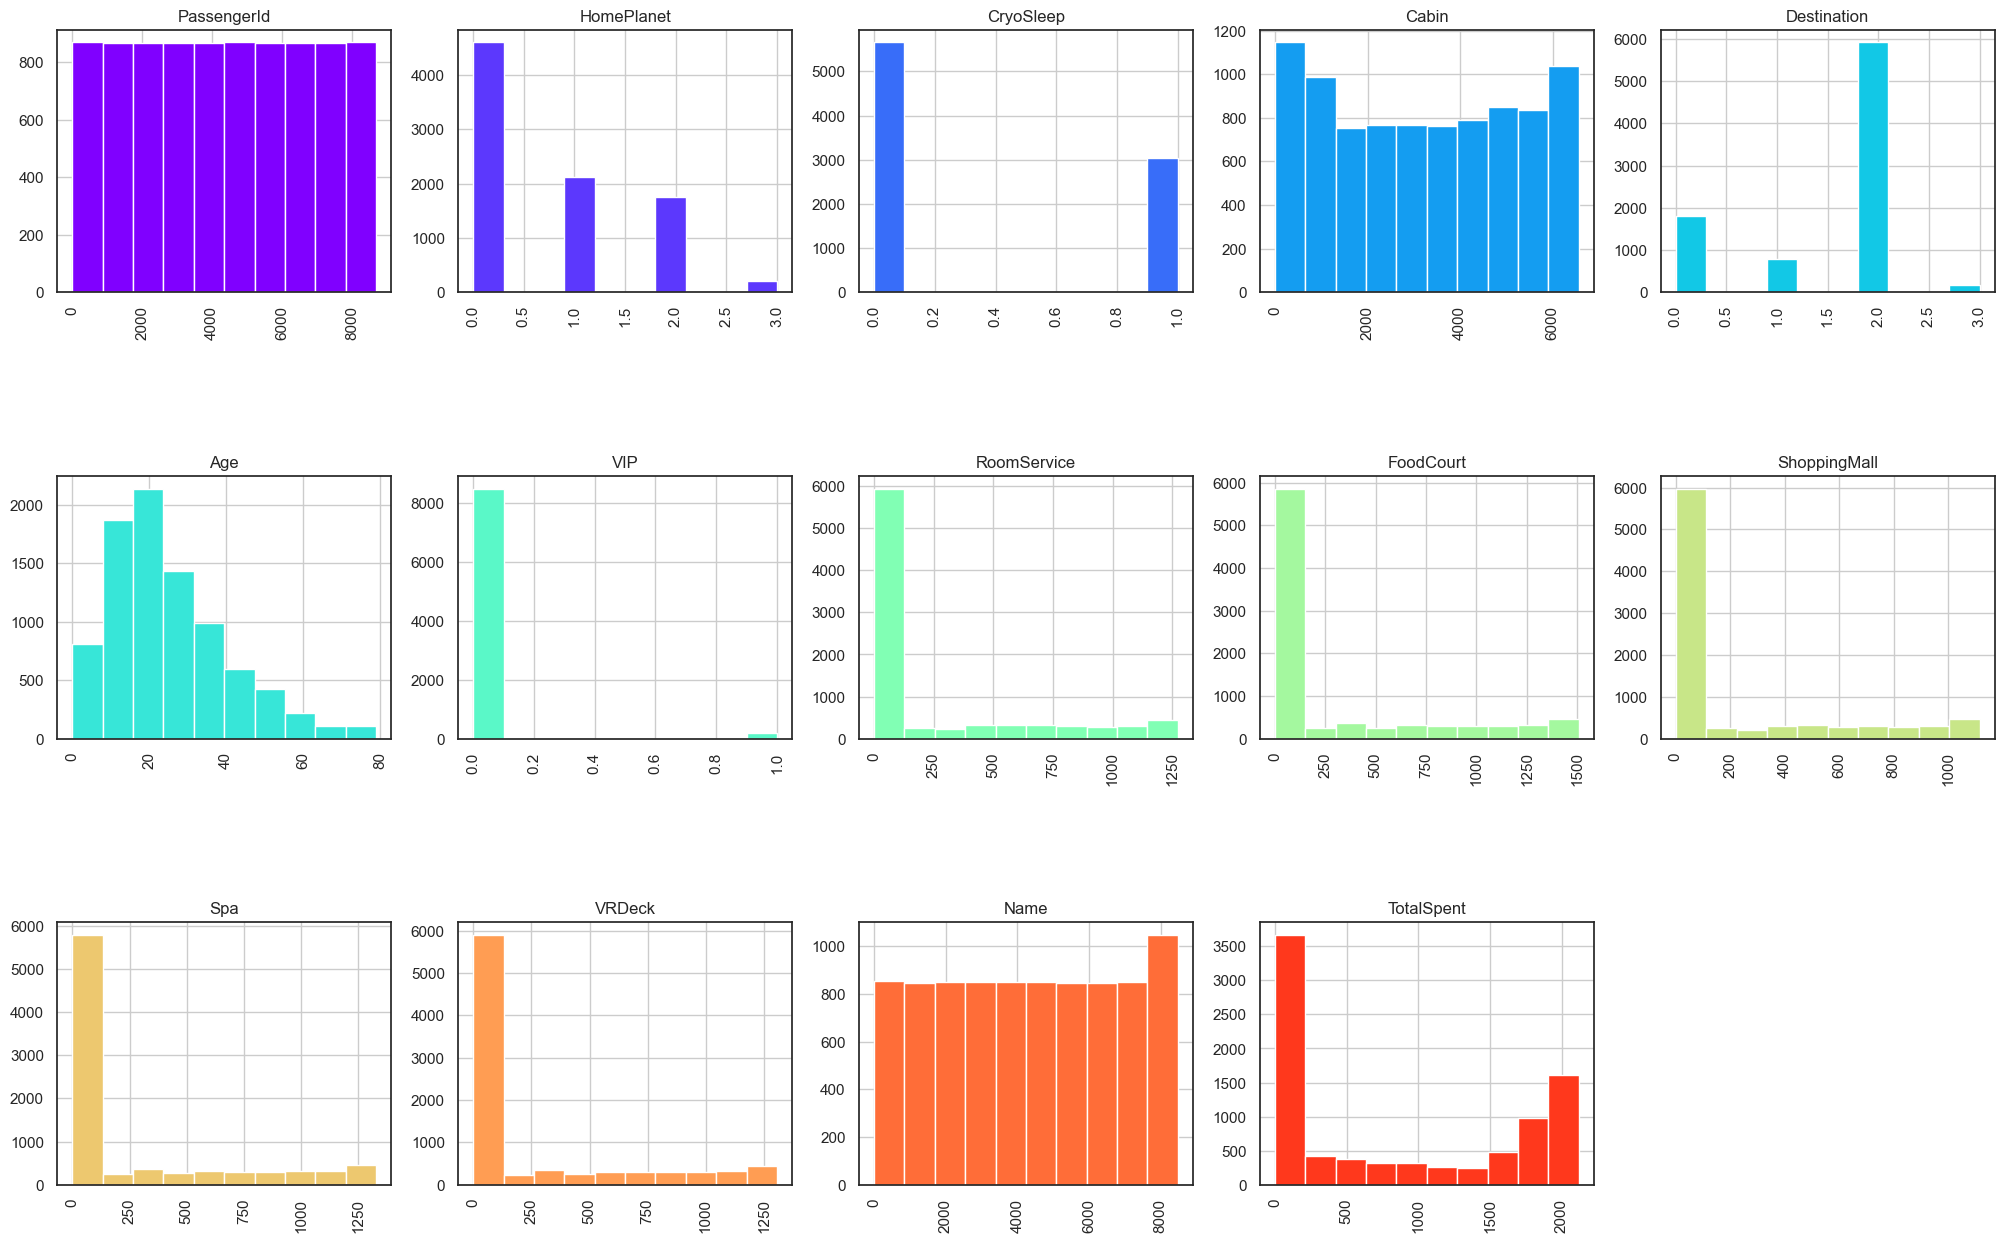

In [286]:
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(X.shape[1]) / cols)
rows= int(rows)

# Define the colormap
cmap = cm.get_cmap('rainbow') 
num_plots = X.shape[1]
colors = [cmap(i/num_plots) for i in range(num_plots)] 



for i, column in enumerate(X.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if X.dtypes[column] == object:
        X_train[column].value_counts().plot(kind="bar", axes=ax,  color=colors[i])
    else:
        X[column].hist(axes=ax, color=colors[i])
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# PREPROCESSING

In [338]:
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

In [339]:

df = df.drop('Cabin', axis=1)

In [340]:
df = df.drop(['PassengerId', 'Name'], axis=1)
df.head(5)

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa          0  TRAPPIST-1e  39.0    0          0.0        0.0   
1      Earth          0  TRAPPIST-1e  24.0    0        109.0        9.0   
2     Europa          0  TRAPPIST-1e  58.0    1         43.0     3576.0   
3     Europa          0  TRAPPIST-1e  33.0    0          0.0     1283.0   
4      Earth          0  TRAPPIST-1e  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck Cabin_num Side  
0           0.0     0.0     0.0            0    B         0    P  
1          25.0   549.0    44.0            1    F         0    S  
2           0.0  6715.0    49.0            0    A         0    S  
3         371.0  3329.0   193.0            0    A         0    S  
4         151.0   565.0     2.0            1    F         1    S

K-Nearest Neighbors (KNN) imputation finds the most similar instances and imputes the missing value based on their values.
###BooleanImputation
###KNN-IMPUTATION

In [341]:
from sklearn.impute import KNNImputer

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
df[['CryoSleep', 'VIP','Transported']] = imputer.fit_transform(df[['CryoSleep', 'VIP','Transported']])


### converting each column to a numeric type (float or int). so as to perform the IMPUTATION process

In [343]:
# Convert columns to numeric (in case they are stored as objects)
columns_to_convert = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Age','CryoSleep','Cabin_num']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

###MEDIAN IMPUTATION 
for columns having prices as this is more robust especially if the data  is skewed.

In [344]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore',)


# Fill missing values with the median

df['RoomService'].fillna(df['RoomService'].median(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace=True)
df['Spa'].fillna(df['Spa'].median(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].median(), inplace=True)

Fill missing values with the mode

In [345]:
#df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True) 
df['Cabin_num'].fillna(df['Cabin_num'].mode()[0], inplace=True) 
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)

In [346]:
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
amt_spent = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']]
print(amt_spent)

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  TotalSpent
0             0.0        0.0           0.0     0.0     0.0         0.0
1           109.0        9.0          25.0   549.0    44.0       736.0
2            43.0     3576.0           0.0  6715.0    49.0     10383.0
3             0.0     1283.0         371.0  3329.0   193.0      5176.0
4           303.0       70.0         151.0   565.0     2.0      1091.0
...           ...        ...           ...     ...     ...         ...
8688          0.0     6819.0           0.0  1643.0    74.0      8536.0
8689          0.0        0.0           0.0     0.0     0.0         0.0
8690          0.0        0.0        1872.0     1.0     0.0      1873.0
8691          0.0     1049.0           0.0   353.0  3235.0      4637.0
8692        126.0     4688.0           0.0     0.0    12.0      4826.0

[8693 rows x 6 columns]


In [347]:
df.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa        0.0  TRAPPIST-1e  39.0  0.0          0.0        0.0   
1      Earth        0.0  TRAPPIST-1e  24.0  0.0        109.0        9.0   
2     Europa        0.0  TRAPPIST-1e  58.0  1.0         43.0     3576.0   
3     Europa        0.0  TRAPPIST-1e  33.0  0.0          0.0     1283.0   
4      Earth        0.0  TRAPPIST-1e  16.0  0.0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck  Cabin_num Side  TotalSpent  
0           0.0     0.0     0.0          0.0    B        0.0    P         0.0  
1          25.0   549.0    44.0          1.0    F        0.0    S       736.0  
2           0.0  6715.0    49.0          0.0    A        0.0    S     10383.0  
3         371.0  3329.0   193.0          0.0    A        0.0    S      5176.0  
4         151.0   565.0     2.0          1.0    F        1.0    S      1091.0

8494

# we have to encode 3 categorical columns in df and then proceed with modelling

In [351]:
# categorical columns
#for col in df.select_dtypes(include=['object']):
df['Side'].fillna(df['Side'].mode()[0], inplace=True)
df['Deck'].fillna(df['Deck'].mode()[0], inplace=True)


In [352]:
cat_col = df.drop(columns=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','CryoSleep','VIP','TotalSpent','Cabin_num'])
print(cat_col)

     HomePlanet    Destination  Transported Deck Side
0        Europa    TRAPPIST-1e          0.0    B    P
1         Earth    TRAPPIST-1e          1.0    F    S
2        Europa    TRAPPIST-1e          0.0    A    S
3        Europa    TRAPPIST-1e          0.0    A    S
4         Earth    TRAPPIST-1e          1.0    F    S
...         ...            ...          ...  ...  ...
8688     Europa    55 Cancri e          0.0    A    P
8689      Earth  PSO J318.5-22          0.0    G    S
8690      Earth    TRAPPIST-1e          1.0    G    S
8691     Europa    55 Cancri e          0.0    E    S
8692     Europa    TRAPPIST-1e          1.0    E    S

[8693 rows x 5 columns]


In [353]:
num_col = df.drop(columns=['HomePlanet','Destination','Transported','Deck' ,'Side'])
print(num_col)

      CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0           0.0  39.0  0.0          0.0        0.0           0.0     0.0   
1           0.0  24.0  0.0        109.0        9.0          25.0   549.0   
2           0.0  58.0  1.0         43.0     3576.0           0.0  6715.0   
3           0.0  33.0  0.0          0.0     1283.0         371.0  3329.0   
4           0.0  16.0  0.0        303.0       70.0         151.0   565.0   
...         ...   ...  ...          ...        ...           ...     ...   
8688        0.0  41.0  1.0          0.0     6819.0           0.0  1643.0   
8689        1.0  18.0  0.0          0.0        0.0           0.0     0.0   
8690        0.0  26.0  0.0          0.0        0.0        1872.0     1.0   
8691        0.0  32.0  0.0          0.0     1049.0           0.0   353.0   
8692        0.0  44.0  0.0        126.0     4688.0           0.0     0.0   

      VRDeck  Cabin_num  TotalSpent  
0        0.0        0.0         0.0  
1       44.

In [359]:

na_string_count_per_column = (df == 'nan').sum()
print(na_string_count_per_column)


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cabin_num       0
Side            0
TotalSpent      0
dtype: int64


In [358]:
df

HomePlanet  CryoSleep    Destination   Age  VIP  RoomService  FoodCourt  \
0        Europa        0.0    TRAPPIST-1e  39.0  0.0          0.0        0.0   
1         Earth        0.0    TRAPPIST-1e  24.0  0.0        109.0        9.0   
2        Europa        0.0    TRAPPIST-1e  58.0  1.0         43.0     3576.0   
3        Europa        0.0    TRAPPIST-1e  33.0  0.0          0.0     1283.0   
4         Earth        0.0    TRAPPIST-1e  16.0  0.0        303.0       70.0   
...         ...        ...            ...   ...  ...          ...        ...   
8688     Europa        0.0    55 Cancri e  41.0  1.0          0.0     6819.0   
8689      Earth        1.0  PSO J318.5-22  18.0  0.0          0.0        0.0   
8690      Earth        0.0    TRAPPIST-1e  26.0  0.0          0.0        0.0   
8691     Europa        0.0    55 Cancri e  32.0  0.0          0.0     1049.0   
8692     Europa        0.0    TRAPPIST-1e  44.0  0.0        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  Transported Deck  Cabin_num Side  \
0              0.0     0.0     0.0          0.0    B        0.0    P   
1             25.0   549.0    44.0          1.0    F        0.0    S   
2              0.0  6715.0    49.0          0.0    A        0.0    S   
3            371.0  3329.0   193.0          0.0    A        0.0    S   
4            151.0   565.0     2.0          1.0    F        1.0    S   
...            ...     ...     ...          ...  ...        ...  ...   
8688           0.0  1643.0    74.0          0.0    A       98.0    P   
8689           0.0     0.0     0.0          0.0    G     1499.0    S   
8690        1872.0     1.0     0.0          1.0    G     1500.0    S   
8691           0.0   353.0  3235.0          0.0    E      608.0    S   
8692           0.0     0.0    12.0          1.0    E      608.0    S   

      TotalSpent  
0            0.0  
1          736.0  
2        10383.0  
3         5176.0  
4         1091.0  
...          ...  
8688      8536.0  
8689         0.0  
8690      1873.0  
8691      4637.0  
8692      4826.0  

[8693 rows x 15 columns]

In [389]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Columns to encode
columns_to_encode = ['Destination', 'HomePlanet', 'Deck', 'Side']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the specified columns
encoded_data = encoder.fit_transform(df[columns_to_encode])

# Get the feature names from the encoder
feature_names = encoder.get_feature_names_out(columns_to_encode)

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=df.index)

# Combine the original DataFrame with the encoded columns
df_final = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

In [390]:
df_final.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Cabin_num', 'TotalSpent',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'HomePlanet_nan', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S'],
      dtype='object')

In [391]:
DF = df_final

Splitting the Dataset

In [392]:
y = DF['Transported']
X = DF.drop('Transported',axis=1)
print(DF.shape, y.shape)
print(test.shape)

(8693, 28) (8693,)
(4277, 13)


In [393]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train shape : ", X_train.shape)
print("X test shape : ", X_test.shape)
print("y train shape : ", y_train.shape)
print("y test shape : ", y_test.shape)

X train shape :  (6954, 27)
X test shape :  (1739, 27)
y train shape :  (6954,)
y test shape :  (1739,)


In [394]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   float64
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   float64
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   float64
 9   Cabin_num                  8693 non-null   float64
 10  TotalSpent                 8693 non-null   float64
 11  Destination_55 Cancri e    8693 non-null   float64
 12  Destination_PSO J318.5-22  8693 non-null   float64
 13  Destination_TRAPPIST-1e    8693 non-null   float

In [187]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
# from sklearn.compose import make_column_transformer

# # #converting X_train and X_test to a DataFrame
# # if isinstance(X_train, np.ndarray):
# #     X_train = pd.DataFrame(X_train)
# # if isinstance(X_test, np.ndarray):
# #     X_test = pd.DataFrame(X_test) 

# ct = make_column_transformer(
#     (MinMaxScaler(), num_col),
#     (StandardScaler(), num_col),
#     remainder='passthrough'
# )

# X_train = ct.fit_transform(X_train)
# X_test = ct.transform(X_test)

In [395]:
cat_col = df.drop(columns=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','CryoSleep','VIP','TotalSpent','Cabin_num'])
print(cat_col)

     HomePlanet    Destination  Transported Deck Side
0        Europa    TRAPPIST-1e          0.0    B    P
1         Earth    TRAPPIST-1e          1.0    F    S
2        Europa    TRAPPIST-1e          0.0    A    S
3        Europa    TRAPPIST-1e          0.0    A    S
4         Earth    TRAPPIST-1e          1.0    F    S
...         ...            ...          ...  ...  ...
8688     Europa    55 Cancri e          0.0    A    P
8689      Earth  PSO J318.5-22          0.0    G    S
8690      Earth    TRAPPIST-1e          1.0    G    S
8691     Europa    55 Cancri e          0.0    E    S
8692     Europa    TRAPPIST-1e          1.0    E    S

[8693 rows x 5 columns]


In [396]:
num_col = df.drop(columns=['HomePlanet','Destination','Transported','Deck' ,'Side'])
print(num_col)

      CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0           0.0  39.0  0.0          0.0        0.0           0.0     0.0   
1           0.0  24.0  0.0        109.0        9.0          25.0   549.0   
2           0.0  58.0  1.0         43.0     3576.0           0.0  6715.0   
3           0.0  33.0  0.0          0.0     1283.0         371.0  3329.0   
4           0.0  16.0  0.0        303.0       70.0         151.0   565.0   
...         ...   ...  ...          ...        ...           ...     ...   
8688        0.0  41.0  1.0          0.0     6819.0           0.0  1643.0   
8689        1.0  18.0  0.0          0.0        0.0           0.0     0.0   
8690        0.0  26.0  0.0          0.0        0.0        1872.0     1.0   
8691        0.0  32.0  0.0          0.0     1049.0           0.0   353.0   
8692        0.0  44.0  0.0        126.0     4688.0           0.0     0.0   

      VRDeck  Cabin_num  TotalSpent  
0        0.0        0.0         0.0  
1       44.

In [404]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['Age','TotalSpent']),
#         #('cat', OneHotEncoder(), ['HomePlanet', 'Deck','Side'])
#         #('cat1', SimpleImputer(), ['Destination' , 'HomePlanet', 'Deck'] )
#     ])


In [367]:
# preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'TotalSpent']),
                                ('cat', OneHotEncoder(),
                                 ['Destination', 'HomePlanet', 'Deck',
                                  'Side'])])

In [405]:
# X_transformed = preprocessor.fit_transform(X)
# print(X_transformed)


[[ 0.71194537 -0.51406554]
 [-0.33403748 -0.25147891]
 [ 2.03685698  3.1903326 ]
 ...
 [-0.1945731   0.15417463]
 [ 0.22382004  1.14030161]
 [ 1.06060632  1.20773215]]


In [406]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")       
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

code for PR curve

In [207]:
# from sklearn.metrics import precision_recall_curve


# def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
#     plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
#     plt.xlabel("Threshold")
#     plt.legend(loc="upper left")
#     plt.title("Precisions/recalls tradeoff")


# precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))


# plt.figure(figsize=(15, 10))
# plt.subplot(2, 2, 1)
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# plt.subplot(2, 2, 2)
# plt.plot(precisions, recalls)
# plt.xlabel("Precision")
# plt.ylabel("Recall")
# plt.title("PR Curve: precisions/recalls tradeoff");

In [ ]:
from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(9,6)); 
plot_roc_curve(fpr, tpr)
plt.show();

to produce roc curve use this below

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, lr_clf.predict(X_test))

Best parameters: {'C': 0.7, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l2', 'solver': 'liblinear'}

In [407]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline , Pipeline

lr_clf = LogisticRegression(solver='liblinear', C=0.7, class_weight={1: 0.7, 0: 0.7}, penalty='l2')
# Create a pipeline that first applies preprocessing and then trains the model
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', lr_clf)
# ])

pipelr = make_pipeline(preprocessor,lr_clf)
pipelr.fit(X_train, y_train)
y_pred = pipelr.predict(X_test)


#pipeline.fit(X_train, y_train)
#y_pred = pipeline.predict(X_test)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

ValueError: X has 27 features, but LogisticRegression is expecting 2 features as input.

In [427]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

# print(classification_report(y_test, y_pred))


print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)



Train Result:

Accuracy Score: 99.94%
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.999710     0.999143  0.999425     0.999427      0.999425
recall        0.999131     0.999714  0.999425     0.999423      0.999425
f1-score      0.999421     0.999429  0.999425     0.999425      0.999425
support    3454.000000  3500.000000  0.999425  6954.000000   6954.000000
Confusion Matrix: 
 [[3451    3]
 [   1 3499]]

Test Result:

Accuracy Score: 79.99%
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy    macro avg  weighted avg
precision    0.786592    0.813981  0.799885     0.800287      0.800420
recall       0.817654    0.782460  0.799885     0.800057      0.799885
f1-score     0.801822    0.797909  0.799885     0.799866      0.799847
support    861.000000  878.000000  0.799885  1739.000000   1739.000000
Confusion Matrix: 
 [[704 157]
 [191 687]]



In [424]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Create a pipeline that first applies preprocessing and then trains the model

# piperfc = make_pipeline(preprocessor,rf_clf)
# piperfc.fit(X_train, y_train)
# y_pred = piperfc.predict(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_clf.fit(X_train_scaled, y_train)
y_pred = rf_clf.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


# print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
# print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)



Accuracy: 0.7987349051178838
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80       861
         1.0       0.81      0.78      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [428]:
from sklearn.model_selection import GridSearchCV


lr_clf = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(
    penalty=penalty, 
    C=C, 
    class_weight=class_weight, 
    solver=solver
)

lr_cv = GridSearchCV(
    estimator=lr_clf, 
    param_grid=param_grid, 
    scoring='f1',
    verbose=1, 
    n_jobs=-1, 
    cv=10
)

lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best parameters: {'C': 0.5, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l1', 'solver': 'liblinear'}
Train Result:

Accuracy Score: 79.31%
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.852643     0.751526  0.793069     0.802084      0.801750
recall        0.705269     0.879714  0.793069     0.792492      0.793069
f1-score      0.771985     0.810583  0.793069     0.791284      0.791412
support    3454.000000  3500.000000  0.793069  6954.000000   6954.000000
Confusion Matrix: 
 [[2436 1018]
 [ 421 3079]]

Test Result:

Accuracy Score: 78.26%
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy    macro avg  weighted avg
precision    0.847482    0.739464  0.782634     0.793473      0.792945
recall       0.684088    0.879271  0.782634     0.781680      0.782634
f1-score     0.757069    0.803330  0.782634     0.780200      0.780426
support    861.00

In [220]:
num_col.columns

Index(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'TotalSpent', 'Age'],
      dtype='object')

## naive bayes


In [431]:
from sklearn.naive_bayes import GaussianNB


# Create a Gaussian Naive Bayes model
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

print_score(nb, X_train, y_train, X_test, y_test, train=True)
print_score(nb, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 73.51%
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.863718     0.674968  0.735116     0.769343      0.768719
recall        0.554140     0.913714  0.735116     0.733927      0.735116
f1-score      0.675132     0.776402  0.735116     0.725767      0.726102
support    3454.000000  3500.000000  0.735116  6954.000000   6954.000000
Confusion Matrix: 
 [[1914 1540]
 [ 302 3198]]

Test Result:

Accuracy Score: 73.38%
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy    macro avg  weighted avg
precision    0.859206    0.675105  0.733755     0.767156      0.766256
recall       0.552846    0.911162  0.733755     0.732004      0.733755
f1-score     0.672792    0.775570  0.733755     0.724181      0.724683
support    861.000000  878.000000  0.733755  1739.000000   1739.000000
Confusion Matrix: 
 [[476 385]
 [ 78 800]]



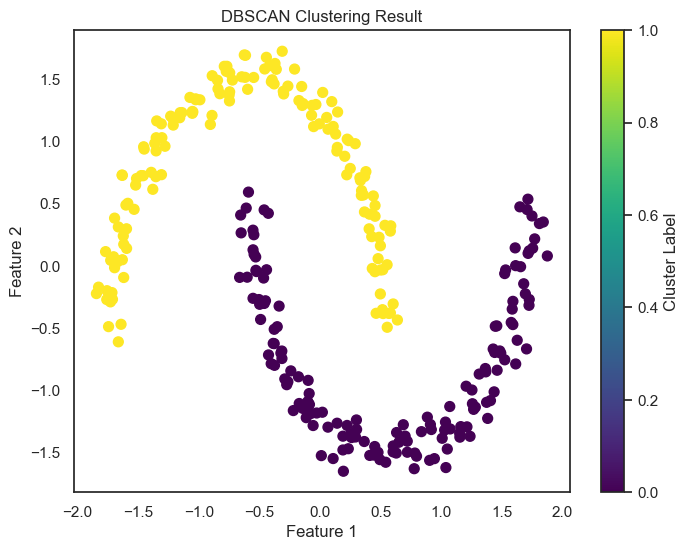

Number of clusters: 2
Number of noise points: 0


In [412]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generating a dataset with two interleaving half circles (moons)
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Standardizing the dataset to improve clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

# Extracting cluster labels and identifying core and noise points
labels = dbscan.labels_  # Cluster labels (-1 indicates noise)
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbscan.core_sample_indices_] = True

# Plotting the result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Print unique clusters and number of noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")


# SVM

In [421]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='rbf', random_state=42)

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.7901092581943646
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79       861
         1.0       0.79      0.80      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



# HPT FOR SVM

In [434]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Create an SVM model
svm = SVC()

# Define the hyperparameters and their values to be tested
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6)),  # Kernel coefficient
    'kernel': ['linear', 'rbf']       # Kernel types
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Train the model with Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.2f}')

KeyboardInterrupt: 

In [433]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
                      activation='relu',              # Activation function
                      solver='adam',                  # Solver for weight optimization
                      max_iter=1000,                  # Maximum number of iterations
                      random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.7567567567567568
              precision    recall  f1-score   support

         0.0       0.85      0.62      0.72       861
         1.0       0.70      0.89      0.79       878

    accuracy                           0.76      1739
   macro avg       0.78      0.76      0.75      1739
weighted avg       0.78      0.76      0.75      1739

